# Task
Analyze the California Housing Prices dataset using a Linear Regression model, including data loading, preprocessing, model training, evaluation with MSE and R-squared, and visualization of predictions.

## Load Dataset

### Subtask:
Load the California Housing Prices dataset using `kagglehub` as specified, ensuring the data is loaded into a pandas DataFrame. Display the first few rows to confirm successful loading.


**Reasoning**:
The first step is to import the necessary libraries, `kagglehub` for downloading the dataset and `pandas` for data manipulation, and then download the dataset to a temporary directory.



In [3]:
import kagglehub
import pandas as pd
import os

# Download the dataset from a publicly accessible source
# Using 'camnugent/california-housing-prices' as a widely available alternative
path = kagglehub.dataset_download('camnugent/california-housing-prices')
print(f"Dataset downloaded to: {path}")

# Construct the full path to the CSV file (usually 'housing.csv' in this dataset)
csv_file_path = os.path.join(path, 'housing.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows to confirm successful loading
print("First 5 rows of the dataset:")
display(df.head())

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Dataset downloaded to: /kaggle/input/california-housing-prices
First 5 rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Initial Data Exploration

### Subtask:
Perform an initial exploration of the dataset to understand its structure. This includes checking data types, identifying the number of rows and columns, and reviewing basic descriptive statistics (`.info()`, `.describe()`).


**Reasoning**:
To perform an initial exploration of the dataset, I will display its information, descriptive statistics, and shape using `df.info()`, `df.describe()`, and `df.shape` respectively, as per the instructions.



In [4]:
print("DataFrame Info:")
df.info()

print("\nDataFrame Description:")
display(df.describe())

print(f"\nDataFrame Shape: {df.shape[0]} rows, {df.shape[1]} columns")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

DataFrame Description:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



DataFrame Shape: 20640 rows, 10 columns


## Data Preprocessing and Feature Engineering

### Subtask:
Handle missing values, if any, using appropriate imputation strategies (e.g., mean, median). Identify and prepare features (X) and the target variable (y), which is 'median_house_value'. Apply feature scaling (e.g., StandardScaler) to numerical features to standardize them.


**Reasoning**:
The first step is to handle missing values in the 'total_bedrooms' column by imputing them with the median, as identified from the previous `df.info()` output, and then verify that there are no remaining missing values.



In [5]:
print("Missing values before imputation:")
print(df.isnull().sum())

# Impute missing values in 'total_bedrooms' with the median
median_total_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

print(f"'total_bedrooms' missing values filled with median: {median_total_bedrooms}")

Missing values before imputation:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
'total_bedrooms' missing values filled with median: 435.0


/tmp/ipython-input-2569442943.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)


**Reasoning**:
The previous step successfully handled missing values. The next logical steps according to the subtask are to separate features and target, perform one-hot encoding on categorical features, and then apply feature scaling to the numerical features. I will combine these steps into a single code block for efficiency.



In [6]:
from sklearn.preprocessing import StandardScaler

# 2. Separate features (X) and target variable (y)
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

# 3. Identify categorical features and apply one-hot encoding
categorical_features = X.select_dtypes(include=['object']).columns
X_categorical = pd.get_dummies(X[categorical_features], drop_first=True)

# Identify numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
X_numerical = X[numerical_features]

# Concatenate numerical and one-hot encoded categorical features
X = pd.concat([X_numerical, X_categorical], axis=1)

# 4 & 5. Apply feature scaling to numerical features
# Re-identify numerical columns after concatenation, excluding new dummy variables if they were numeric like
numerical_cols_for_scaling = X_numerical.columns.tolist() # Use the original numerical columns list for scaling

scaler = StandardScaler()
X[numerical_cols_for_scaling] = scaler.fit_transform(X[numerical_cols_for_scaling])

print("Features (X) after preprocessing and scaling:")
display(X.head())
print("Target (y) head:")
display(y.head())


Features (X) after preprocessing and scaling:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,False,False,True,False
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,False,False,True,False
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,False,False,True,False
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,False,False,True,False
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,False,False,True,False


Target (y) head:


,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed dataset into training and testing subsets using `train_test_split` from scikit-learn, typically with an 80/20 split, to prepare for model training and unbiased evaluation.


**Reasoning**:
To divide the preprocessed dataset into training and testing subsets, I need to import the `train_test_split` function from `sklearn.model_selection` and then apply it to the `X` and `y` dataframes with the specified `test_size` and `random_state`.



In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 12)
Shape of X_test: (4128, 12)
Shape of y_train: (16512,)
Shape of y_test: (4128,)


## Build and Train Linear Regression Model

### Subtask:
Initialize a `LinearRegression` model from scikit-learn and train it using the prepared training data (X_train, y_train).


**Reasoning**:
To initialize and train a Linear Regression model, I will import the `LinearRegression` class, instantiate it, and then fit the model using the `X_train` and `y_train` datasets.



In [8]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Model Evaluation

### Subtask:
Evaluate the trained model's performance on the testing dataset (X_test, y_test). Calculate and report key metrics such as Mean Squared Error (MSE) and R-squared to assess the model's accuracy and fit.


**Reasoning**:
To evaluate the trained model, I will first make predictions on the test set, then calculate and print the Mean Squared Error (MSE) and R-squared metrics.



In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 4908476721.16
R-squared (R2): 0.63


## Visualize Predictions

### Subtask:
Create a scatter plot comparing the actual target values from the test set against the model's predicted values. Include a diagonal line representing perfect predictions (y=x) to visually assess model performance and add appropriate labels and a legend.


**Reasoning**:
To visualize the model's performance, I will create a scatter plot comparing actual vs. predicted values, include a diagonal line for perfect predictions, and add appropriate labels, a title, and a legend, as specified in the instructions.



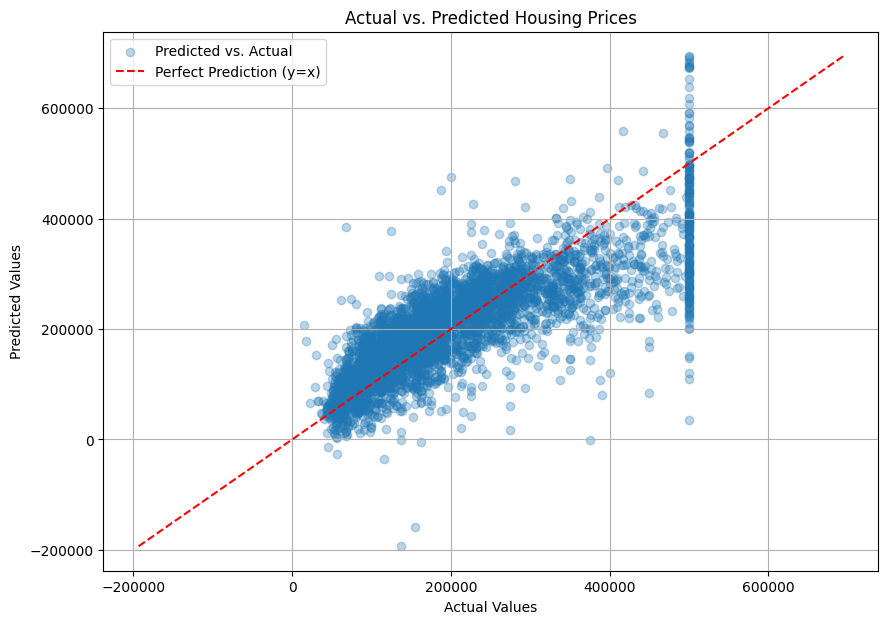

In [10]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.3, label='Predicted vs. Actual')

# Add a diagonal line representing perfect predictions
# Determine the range for the diagonal line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction (y=x)')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Housing Prices')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Provide a comprehensive summary of the linear regression model's implementation, including its performance metrics, insights gained from the evaluation, and potential next steps for improvement.
